In [111]:
import pandas as pd
import numpy as np
import re
import dask.dataframe as ddf
from math import nan
import panel as pn
import dask
import dask.dataframe as dd

from dask.diagnostics import ProgressBar
ProgressBar().register()

import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [112]:
df_2020 = pd.read_parquet('/data/common/trade_data/import_data_2018_enhanced.parq')

In [113]:
df_2020.columns

Index(['BookingNumber', 'BOLNumber', 'Shipper', 'ShipperAddress', 'Consignee',
       'ConsigneeAddress', 'TwentyFeetContainerCount',
       'FortyFeetContainerCount', 'TrunkVVD', 'CarrierVesselName',
       'PlaceOfReceipt', 'PortOfLoading', 'PortOfDischarge',
       'FinalDeliveryPort', 'CargoWeightKgs', 'CargoVolumeCubicMeters',
       'NumberOfPackages', 'PackingUnit', 'CommodityRepCode', 'CommodityCode',
       'CommodityDescription', 'CustomsDescription', 'FreightTerm',
       'FreightForwarderName', 'NotifyPartyName', 'NotifyPartyAddress',
       'AlsoNotifyOtherName', 'ExportName', 'TrunkPOL', 'TrunkPOD',
       'BookingPartyPhoneNumber', 'BookingPartyEmail',
       'ShippingInstructorPhoneNumber', 'ShippingInstructorEmail',
       'SailingDateOfVessel', 'ShipmentRevenueWeek', 'ActivityTEU',
       'ActivityFEU', 'EmptyContainersPickUpLocation',
       'PlaceOfReceipt_Country', 'PlaceOfReceipt_Latitude',
       'PlaceOfReceipt_Longitude', 'PortOfLoading_Country',
       'PortOf

In [114]:
"""
BOLNumber
PortOfLoading_Country
PortOfLoading_Latitude
PortOfLoading_Longitude
FinalDeliveryPort_Country
FinalDeliveryPort_Latitude
FinalDeliveryPort_Longitude
"""

'\nBOLNumber\nPortOfLoading_Country\nPortOfLoading_Latitude\nPortOfLoading_Longitude\nFinalDeliveryPort_Country\nFinalDeliveryPort_Latitude\nFinalDeliveryPort_Longitude\n'

In [115]:
overseas_df = df_2020[(df_2020["PortOfLoading_Country"] != df_2020["FinalDeliveryPort_Country"])]
print(len(overseas_df))

overseas_df = overseas_df[overseas_df["PortOfLoading"].str.slice(0, 2)!='US']
print(len(overseas_df))

400495
397221


In [116]:
overseas_cnt_df = overseas_df.groupby(["FinalDeliveryPort_Country", "FinalDeliveryPort_Longitude","FinalDeliveryPort_Latitude","PortOfLoading_Country", "PortOfLoading_Longitude","PortOfLoading_Latitude", "PortOfLoading", "FinalDeliveryPort"]).count()[["BOLNumber"]].rename(columns={"BOLNumber":"Num_Shipments"}).reset_index()

In [117]:
overseas_cnt_df['Bin'] = np.where(overseas_cnt_df['Num_Shipments'] < 501 , '0-500', '')
overseas_cnt_df['Bin'] = np.where(overseas_cnt_df['Num_Shipments'] > 500 , '501-1000', overseas_cnt_df['Bin'])
overseas_cnt_df['Bin'] = np.where(overseas_cnt_df['Num_Shipments'] > 1000 , '1000+', overseas_cnt_df['Bin'])

In [118]:
len(overseas_cnt_df)

7086

In [119]:
overseas_cnt_df.describe()

,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Longitude,PortOfLoading_Latitude,Num_Shipments
count,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000
mean,-94.495143,38.104504,100.624141,25.511025,53.799605
std,17.632006,5.438263,45.524809,12.934032,403.292687
min,-167.949241,18.335601,-130.325490,-37.814218,1.000000
25%,-109.832860,33.956215,103.819499,20.858864,2.000000
50%,-89.244299,38.624495,114.266188,29.862219,5.000000
75%,-81.529758,41.343519,121.469207,34.940526,17.000000
max,120.378137,70.245011,153.023499,55.774622,20045.000000


In [120]:
overseas_cnt_df.groupby(['Bin']).count()

,FinalDeliveryPort_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Country,PortOfLoading_Longitude,PortOfLoading_Latitude,PortOfLoading,FinalDeliveryPort,Num_Shipments
Bin,,,,,,,,,
0-500,6961,6961,6961,6961,6961,6961,6961,6961,6961
1000+,60,60,60,60,60,60,60,60,60
501-1000,65,65,65,65,65,65,65,65,65


In [121]:
subset_df_1 = overseas_cnt_df.sort_values(by='Num_Shipments', ascending=False).head(10)
subset_df_1

,FinalDeliveryPort_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Country,PortOfLoading_Longitude,PortOfLoading_Latitude,PortOfLoading,FinalDeliveryPort,Num_Shipments,Bin
1110,USA,-118.191604,33.769016,China,121.469207,31.232276,CNSHA,USLGB,20045,1000+
1091,USA,-118.191604,33.769016,China,114.232441,22.559050,CNYIT,USLGB,12590,1000+
979,USA,-118.242766,34.053691,China,114.232441,22.559050,CNYIT,USLAX,9953,1000+
6729,USA,-74.006015,40.712728,China,121.469207,31.232276,CNSHA,USNYC,7773,1000+
1147,USA,-118.191604,33.769016,Korea,129.075236,35.179953,KRPUS,USLGB,7341,1000+
6768,USA,-74.006015,40.712728,Korea,129.075236,35.179953,KRPUS,USNYC,4949,1000+
5445,USA,-81.091177,32.080926,China,121.620387,29.862219,CNNBO,USSAV,4937,1000+
2628,USA,-95.367697,29.758938,China,114.232441,22.559050,CNYIT,USHOU,4510,1000+
1509,USA,-117.138585,33.504574,Bangladesh,91.496770,22.931975,BDCGP,USMIK,4383,1000+
997,USA,-118.242766,34.053691,China,121.620387,29.862219,CNNBO,USLAX,4321,1000+


In [122]:
subset_df_2 = overseas_cnt_df[overseas_cnt_df['Bin']=='0-500'].sort_values(by='Num_Shipments', ascending=False).head(10)
subset_df_2

,FinalDeliveryPort_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Country,PortOfLoading_Longitude,PortOfLoading_Latitude,PortOfLoading,FinalDeliveryPort,Num_Shipments,Bin
1578,USA,-116.083314,34.825302,China,121.469207,31.232276,CNSHA,USSBT,500,0-500
1017,USA,-118.242766,34.053691,Malaysia,101.396674,3.002762,MYPKG,USLAX,499,0-500
5720,USA,-79.940273,32.787601,China,114.232441,22.559050,CNYIT,USCHS,498,0-500
3930,USA,-87.717549,41.625312,China,114.232441,22.559050,CNYIT,USMIB,486,0-500
6523,USA,-74.394517,40.538238,Vietnam,106.701756,10.775844,VNSGN,USEDN,474,0-500
4436,USA,-85.505655,36.154558,Indonesia,106.827183,-6.175394,IDJKT,USPHX,472,0-500
833,USA,-119.708861,36.729529,China,121.469207,31.232276,CNSHA,USFAT,471,0-500
1985,USA,-101.335390,35.363656,China,114.232441,22.559050,CNYIT,USCRU,463,0-500
4168,USA,-86.585901,34.729847,Korea,129.075236,35.179953,KRPUS,USHSV,461,0-500
6310,USA,-75.546589,39.745947,China,120.378137,36.063803,CNTAO,USILM,460,0-500


In [123]:
subset_df = pd.concat([subset_df_1, subset_df_2])
subset_df

,FinalDeliveryPort_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Country,PortOfLoading_Longitude,PortOfLoading_Latitude,PortOfLoading,FinalDeliveryPort,Num_Shipments,Bin
1110,USA,-118.191604,33.769016,China,121.469207,31.232276,CNSHA,USLGB,20045,1000+
1091,USA,-118.191604,33.769016,China,114.232441,22.559050,CNYIT,USLGB,12590,1000+
979,USA,-118.242766,34.053691,China,114.232441,22.559050,CNYIT,USLAX,9953,1000+
6729,USA,-74.006015,40.712728,China,121.469207,31.232276,CNSHA,USNYC,7773,1000+
1147,USA,-118.191604,33.769016,Korea,129.075236,35.179953,KRPUS,USLGB,7341,1000+
6768,USA,-74.006015,40.712728,Korea,129.075236,35.179953,KRPUS,USNYC,4949,1000+
5445,USA,-81.091177,32.080926,China,121.620387,29.862219,CNNBO,USSAV,4937,1000+
2628,USA,-95.367697,29.758938,China,114.232441,22.559050,CNYIT,USHOU,4510,1000+
1509,USA,-117.138585,33.504574,Bangladesh,91.496770,22.931975,BDCGP,USMIK,4383,1000+
997,USA,-118.242766,34.053691,China,121.620387,29.862219,CNNBO,USLAX,4321,1000+


In [124]:
edge_df = subset_df[["PortOfLoading_Country", 'PortOfLoading', 'FinalDeliveryPort_Country', 'FinalDeliveryPort', 'Num_Shipments', 'Bin']]
edge_df

,PortOfLoading_Country,PortOfLoading,FinalDeliveryPort_Country,FinalDeliveryPort,Num_Shipments,Bin
1110,China,CNSHA,USA,USLGB,20045,1000+
1091,China,CNYIT,USA,USLGB,12590,1000+
979,China,CNYIT,USA,USLAX,9953,1000+
6729,China,CNSHA,USA,USNYC,7773,1000+
1147,Korea,KRPUS,USA,USLGB,7341,1000+
6768,Korea,KRPUS,USA,USNYC,4949,1000+
5445,China,CNNBO,USA,USSAV,4937,1000+
2628,China,CNYIT,USA,USHOU,4510,1000+
1509,Bangladesh,BDCGP,USA,USMIK,4383,1000+
997,China,CNNBO,USA,USLAX,4321,1000+


In [125]:
node_df_1 = subset_df[["PortOfLoading_Country", 'PortOfLoading', 'PortOfLoading_Latitude', 'PortOfLoading_Longitude']]
node_df_1.columns = ['Country','Port', "Lat", "Long"]

In [126]:
node_df_2 = overseas_cnt_df[["FinalDeliveryPort_Country", 'FinalDeliveryPort', 'FinalDeliveryPort_Latitude', 'FinalDeliveryPort_Longitude']]
node_df_2.columns = ['Country', 'Port', "Lat", "Long"]

In [127]:
node_df = pd.concat([node_df_1, node_df_2])

In [128]:
node_df.drop_duplicates(inplace=True)

In [129]:
node_df.head()

,Country,Port,Lat,Long
1110,China,CNSHA,31.232276,121.469207
1091,China,CNYIT,22.559050,114.232441
1147,Korea,KRPUS,35.179953,129.075236
5445,China,CNNBO,29.862219,121.620387
1509,Bangladesh,BDCGP,22.931975,91.496770


In [130]:
subset_df

,FinalDeliveryPort_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Country,PortOfLoading_Longitude,PortOfLoading_Latitude,PortOfLoading,FinalDeliveryPort,Num_Shipments,Bin
1110,USA,-118.191604,33.769016,China,121.469207,31.232276,CNSHA,USLGB,20045,1000+
1091,USA,-118.191604,33.769016,China,114.232441,22.559050,CNYIT,USLGB,12590,1000+
979,USA,-118.242766,34.053691,China,114.232441,22.559050,CNYIT,USLAX,9953,1000+
6729,USA,-74.006015,40.712728,China,121.469207,31.232276,CNSHA,USNYC,7773,1000+
1147,USA,-118.191604,33.769016,Korea,129.075236,35.179953,KRPUS,USLGB,7341,1000+
6768,USA,-74.006015,40.712728,Korea,129.075236,35.179953,KRPUS,USNYC,4949,1000+
5445,USA,-81.091177,32.080926,China,121.620387,29.862219,CNNBO,USSAV,4937,1000+
2628,USA,-95.367697,29.758938,China,114.232441,22.559050,CNYIT,USHOU,4510,1000+
1509,USA,-117.138585,33.504574,Bangladesh,91.496770,22.931975,BDCGP,USMIK,4383,1000+
997,USA,-118.242766,34.053691,China,121.620387,29.862219,CNNBO,USLAX,4321,1000+


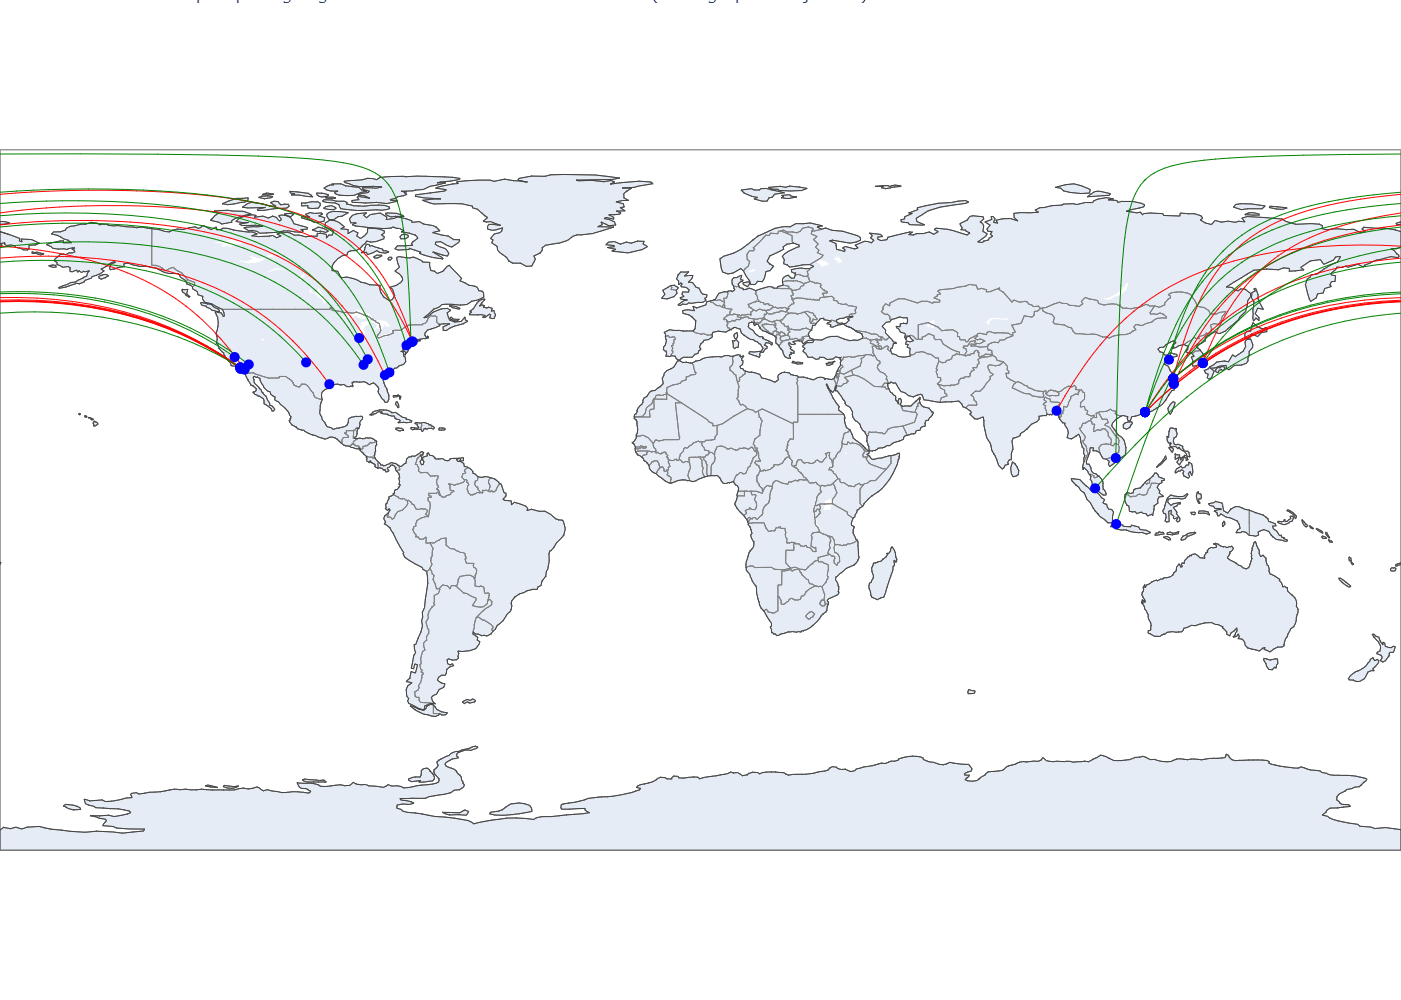

In [131]:
fig = go.Figure()

source_to_dest = zip(subset_df["PortOfLoading_Latitude"], subset_df["FinalDeliveryPort_Latitude"],
                     subset_df["PortOfLoading_Longitude"], subset_df["FinalDeliveryPort_Longitude"],
                     subset_df["Num_Shipments"], subset_df["Bin"], subset_df['PortOfLoading_Country'], subset_df['FinalDeliveryPort_Country'], subset_df['FinalDeliveryPort'])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights, binn, origCountry, destCountry, destPort in source_to_dest:
    color_line = 'red'
    if(binn!='1000+'):
        color_line='green'
    
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = 1, color=color_line),
                        hoverinfo="text",
                        text=origCountry + " to " + destCountry + " " + destPort + " <br> " + "Num Shipments: " + str(num_flights)
                        ))

## Logic to create labels of source and destination cities of flights
#cities = overseas_cnt_df["Cidade.Origem"].values.tolist()+overseas_cnt_df["Cidade.Destino"].values.tolist()
#countries = overseas_cnt_df["Pais.Origem"].values.tolist()+overseas_cnt_df["Pais.Destino"].values.tolist()
#scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = subset_df["PortOfLoading_Longitude"].values.tolist()+subset_df["FinalDeliveryPort_Longitude"].values.tolist(),
                lat = subset_df["PortOfLoading_Latitude"].values.tolist()+subset_df["FinalDeliveryPort_Latitude"].values.tolist(),
                hoverinfo = 'text',
                #text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'blue'))
                
    )

## Update graph layout to improve graph styling.
fig.update_layout(title_text="Connection Map Depicting Flights from Brazil to All Other Countries (Orthographic Projection)",
                  height=1000,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  geo= dict(projection_type = 'equirectangular', showland = True, showcountries=True, countrycolor = 'grey'))

fig.show()

In [132]:
overseas_cnt_df.columns

Index(['FinalDeliveryPort_Country', 'FinalDeliveryPort_Longitude',
       'FinalDeliveryPort_Latitude', 'PortOfLoading_Country',
       'PortOfLoading_Longitude', 'PortOfLoading_Latitude', 'PortOfLoading',
       'FinalDeliveryPort', 'Num_Shipments', 'Bin'],
      dtype='object')

In [133]:
overseas_cnt_df['PortOfLoading_Country'].unique()

array(['China', 'Saudi Arabia', 'Australia', 'Canada', '.', 'Indonesia',
       'Japan', 'Korea', 'Malaysia', 'Taiwan', 'Thailand', 'Vietnam',
       'Italy', 'Spain', 'Philipines', 'India', 'France', 'Singapore',
       'Bangladesh', 'Cambodia', 'Egypt', 'Pakistan', 'South Africa',
       'Sri Lanka', 'UAE', 'Qatar', 'Kenya', 'Myanmar', 'Oman', 'Bahrain',
       'Morocco', 'Kuwait', 'Colombia', 'Panama', 'Portugal', 'Tunisia',
       'Israel', 'Lebanon'], dtype=object)

In [138]:
shipments_by_country = overseas_cnt_df[overseas_cnt_df['PortOfLoading_Country']!='.'].groupby('PortOfLoading_Country').sum('Num_Shipments').sort_values(by='Num_Shipments', ascending=False).reset_index()
shipments_by_country

,PortOfLoading_Country,FinalDeliveryPort_Longitude,FinalDeliveryPort_Latitude,PortOfLoading_Longitude,PortOfLoading_Latitude,Num_Shipments
0,China,-268929.009159,108027.537516,331364.078655,82907.371154,221525
1,Korea,-72065.606600,29760.802185,99817.123424,27239.786798,39470
2,Vietnam,-48552.031179,19350.946884,54291.264172,6282.557573,25375
3,Indonesia,-24460.832828,9919.746592,28331.598128,-1481.714079,16705
4,Japan,-44601.891560,18107.547624,15687.716295,19482.765839,15380
5,Taiwan,-33575.460625,13373.871379,42577.547082,8370.457411,11547
6,Bangladesh,-6345.265395,2608.796001,6214.209316,1557.518110,9963
7,India,-29985.338525,11583.903811,23468.651003,5673.855565,9064
8,Thailand,-21356.864994,8592.813220,22730.019306,2822.130714,8180
9,Malaysia,-24812.284848,9806.046719,26520.146398,857.497409,4422


In [135]:
num_ports_by_country = overseas_cnt_df[overseas_cnt_df['PortOfLoading_Country']!='.'].groupby('PortOfLoading_Country').count()[['FinalDeliveryPort']].sort_values(by='FinalDeliveryPort', ascending=False).reset_index()
num_ports_by_country

,PortOfLoading_Country,FinalDeliveryPort
0,China,2836
1,Korea,776
2,Vietnam,508
3,Japan,477
4,Taiwan,352
5,India,305
6,Malaysia,260
7,Indonesia,258
8,Italy,248
9,Thailand,226


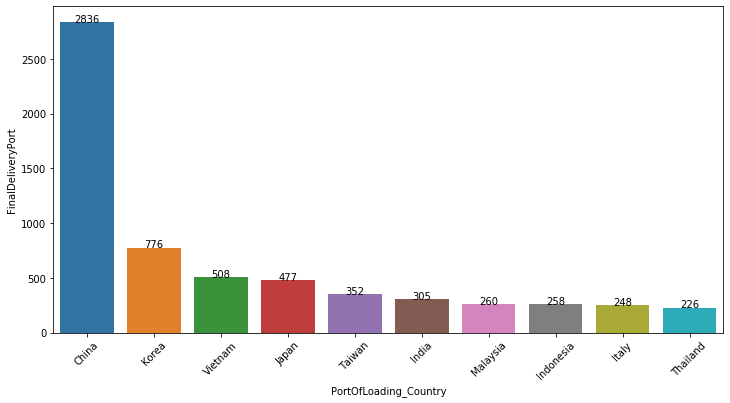

In [136]:
# plot histogram 
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)

ax = sns.barplot(x='PortOfLoading_Country', y='FinalDeliveryPort',data=num_ports_by_country.head(10))
plt.xticks(rotation=45)

# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+1, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center

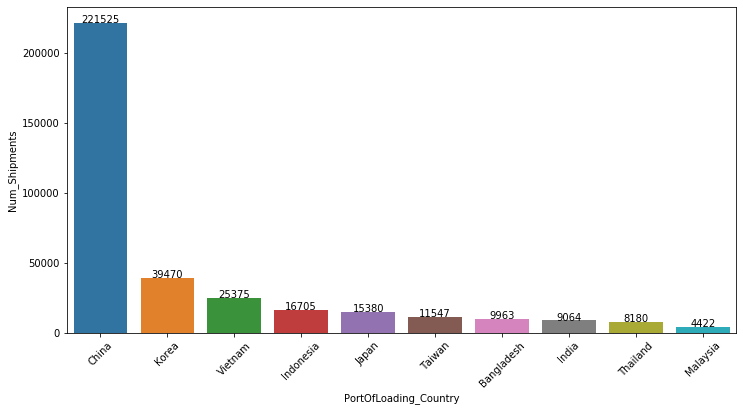

In [137]:
# plot histogram 
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)


ax = sns.barplot(x='PortOfLoading_Country', y='Num_Shipments',data=shipments_by_country.head(10))


# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+1, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
    
plt.show()